**Engy-5310** Computational Continuum Transport Phenomena, UMass Lowell, Chem. Eng. Nuclear Program Spring 2021; Prof. V. F. de Almeida

# Fluoride Salt Cooled High-Temperature Channel Flow
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\flux}{\boldsymbol{q}}
  \newcommand{\velocity}{\boldsymbol{v}}
  \newcommand{\normal}{\boldsymbol{n}}
  \newcommand{\xpoint}{\boldsymbol{x}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\div}{div}
  \DeclareMathOperator{\grad}{grad}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

**Student(s):**  Austin Rotker <br>
**Course:** Engy-5310 Computational Continuum Transport Phenomena  <br>
**Mentor:** Prof. Valmor F. de Almeida

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**25Apr2021**

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Problem Statement](#problem)
* [Objectives](#obj)
* [Approach](#app)
 + [Weak Form of Problem Statement](#weakform)
 + [MOOSE Kernels](#kernels)
 + [Setup](#setup)
 + [Tests](#tests)
   - [Reflector](#reflector)
   - [Salt](#salt)
* [Results and Analysis](#ranalysis)
* [Conclusions](#conclusions)
* [References](#refs)
---

## [Introduction](#toc)<a id="intro"></a>

The Fluoride-Cooled High Temperature Reactor (FHR) is a generation IV design which boasts attractive safety features and economic properties; The FLIBE/NAFZIRF coolant proposed for use in FHRs is supplied to the secondary coolant loop at temperatures approaching 700 $^{\circ}$C, far in excess of outflow coolant temperatures seen in water-cooled designs, which results in higher Brayton cycle efficiency and opens the door for use in applications which require very high temperature process heat. Furthermore, cooling during shutdown is accomplished through natural convection, improving safety and reliability as well as lowering capital costs significantly.

The design itself shares similarities with the High Temperature Gas-Cooled Reactor (HTGR). Fuel is present in the form of spherical pellets rather than the cylindrical ones used in more conventional reactors; The reactor itself consists of an anular space within concentric cylinders within which the primary coolant flows and the fuel pellets are introduced. As the fuel pellets are less dense than the surrounding salt, they will slowly be buoyed up to the top of the reactor if they are introduced continuously at the bottom, with a residence time of about two months. Pellets can hence be introduced and removed from the reactor continuously, with no need to shut down for refueling. Primary coolant also flows within this channel around the fuel pebbles, as shown in the following diagram:



Significant amounts of coolant also flow through the central graphite reflector in channels a few centimeters in diameter:

Holes on the sides of the channels allow for cross flow into the reactor for more efficient heat transfer, although this will not be considered in the model which is to follow.




## [Problem Statement](#toc)<a id="problem"></a>

Compute the temperature distribution on the liquid (salt) and solid (fuel/moderator) phases surrounding a fuel pin enforcing continuity of the temperature field on the interface between salt and fuel, while assuming a heat convection transport model for the wall flux.

### [Strong Form of Problem Statement](#toc)<a id="strong"></a>
The strong form of the governing equation for heat conduction in the graphite on either side of the coolant channel reads

\begin{align*}
  \rho c_p\,\grad_\xpoint T_\text{s}\cdot\velocity + \div_\xpoint(\flux_\text{s}) &= 0 \quad &\forall \quad \xpoint\in \Omega_\text{s}, \\
  \div_\xpoint(\flux_\text{f}) - S &= 0 \quad &\forall \quad \xpoint\in \Omega_\text{f}, \\
\end{align*}



with the following boundary conditions:

\begin{align*}
 T_\text{s}(r, 0) &= T_{\text{s}_0} \quad &\text{salt inflow temperature} \\
 q_{\text{s},z}(r, L) &= 0 \quad &\text{salt outflow normal heat flux} \\
 q_{\text{s},r}(0, z) &= 0 \quad &\text{centerline symmetry} \\
 q_{\text{s},r}(R_\text{i},z) &= h_\text{s,i}\,\bigl(T_\text{s}(R_\text{i}, z) - T_\text{s}(0,z)\bigr) \quad &\text{inner radius interface heat flux}  \\
 \text{} \\
 T_\text{f}(r, 0) &= T_0 \quad &\text{bottom face of fuel pin} \\
 q_{\text{f},z}(r, L) &= 0 \quad &\text{top face of fuel pin axial heat flux} \\
 q_{\text{f},r}(R_\text{i},z) &= - q_{\text{s},r}(R_\text{i},z) \quad &\text{interface flux continuity} \\
 q_{r,\text{f}} &=  h_\text{s,o}\,\bigl(T_\text{f}(R_\text{o}, z) - T_\infty(z)\bigr) \quad  &\text{outer radius interface heat flux} \\
\end{align*}

where: 
A: is the iven temperature at the bottom of the reflector (Dirichlet); B: is the heat flux across the top boundary of the reflector (Neumann); C: all heat conducted to the inner boundary is transferred to the coolant flowing through the coolant flow channels within the graphite reflector (Robin); and D: all heat conducted away from the outer boundary is transferred to the system by the coolantg flowing outside the reflector (Robin).

### [Strong Form of Problem Statement](#toc)<a id="dbcstrong"></a>

Solve the Peclet model problem. Find $u_1:[a,b]\subset\Reals\rightarrow\Reals$ and $u_2:[b,c]\subset\Reals\rightarrow\Reals$ for $D_1 > 0$ and $D_2 > 0$ such that:

\begin{align*}
  v\, u_1' &= -\bigl(-D_1\, u_1'\bigr)'(x) + S(u_1, u_2) \quad \forall \quad x\in [a,b[, \\
 u_1(a) &= A_1,
\end{align*}

and

\begin{align*}
  v\, u_2' &= -\bigl(-D_2\, u_2'\bigr)'(x) - S(u_1, u_2) \quad \forall \quad x\in\, ]b,c], \\
 u_2(c) &= A_2.
\end{align*}

The *diffusion flux* associated to the quantity $u_i, \, \ i=1,2$ is denoted $q_i := -D_i\,u_i'$, and it is often of interest as a derived quantity. Here a point-wise *convective sink (or sweep)* is given by $v\,u_i'$. There exists two Peclet numbers: 

  + Peclet number: $\frac{v\,L}{D_i}$. 

whose effects has been described in earlier notebooks.

Likewise in the single-field Peclet 1-D problem (Notebook 09), the values of the dependent variables are given on the two end points of the domain (*essential* boundary conditions or  *Dirichlet boundary conditions*).

### [Strong Form Fluid Flow and Heat Transport in the Salt](#toc)<a id="strong"></a>
We begin with the strong form for heat conduction through the graphite on either side of the coolant channel.

\begin{align*}
\rho c_p \frac{dT}{dt} &= -k \nabla^2 T + S = -k \Bigl(\frac{d^2}{dr^2} + \frac{d^2}{dz^2}\Bigr) + S
\end{align*}

With the following boundary conditions:

\begin{align*}
T(r, 0) &= T_0 \quad &\text{(A)} \\
\frac{dT}{dz}(r, Z) &= 0 \quad &\text{(B)} \\
-k\, \nabla T(R_\text{i}, z) + h\,\bigl(T(R_\text{i}, z) - T_\text{b,i}(z)\bigr) &= 0 \quad &\text{(C)} \\
-k\, \nabla T(R_\text{o}, z) + h(T(R_\text{o}, z) - T_\text{b,o}(z)) &= 0 \quad  &\text{(D)} \\
\end{align*}

A: Given temperature at the bottom of the reflector (Dirichlet).

B: Zero heat flux across the top boundary of the reflector (Neumann). 

C: All heat conducted to the inner boundary is transferred to the coolant flowing through the coolant flow channels within the graphite reflector (Robin).

D: All heat conducted away from the outer boundary is transferred to the system by the coolantg flowing outside the reflector (Robin).

The equations describing the flow of fluid within the conduit are as follows:

\begin{align*}
\rho c_p (\frac{dT}{dt} + v \cdot \nabla T) &= -k \nabla^2 T \\
\rho \nabla \cdot (v \otimes v) &= \nabla \cdot (-p - \mu(\nabla v \cdot \nabla v^T) + \rho_0 + \beta(T - T_{ref}) \\
\nabla \cdot v &= 0
\end{align*}

With the following boundary conditions on temperature:
\begin{align*}
T(r, 0) &= T_0 \; (A)\\
- k \nabla T(R, z) + h(T(R, z) - T_w(z)) &= 0 \; (B)\\
\frac{dT}{dz}(r, Z) &= 0 \; (C)
\end{align*}

A: Given temperature at the bottom of the reflector (from coolant inflow temperature). (Dirichlett)

B: All heat transferred into the fluid from the wall is carried out by conduction and convection. (Robin)

C: No heat flux across the outflow boundary. (Neumann)

And the following boundary conditions on pressure:

\begin{align*}
p(r, 0) &= P_0 \; (A)\\
\frac{dp(r, Z)}{dz} &= - \tau \vec{n} \; (B)\\
\frac{dp(R, z)}{dx} &= 0 \; (C) 
\end{align*}

A: Given pressure at the bottom of the reflector(from pumping and system pressure). (Dirichlett)

B: No temperature change at the outflow surface and hence no change in buoyancy. Thus the traction vector sums to zero and the rate of change of pressure is simply equal to the sum of the viscous forces acting along the normal boundary vector (in this case, the Z-direction).

C: The pressure gradient across the bounadry is equal to zero (no pressure flux through the walls of the channel).

Note that, in all cases, the velocity $v$ is specified at all points within the liquid phase, and therefore its divergence and gradient are specified as well. Additionally, as we assume steady flow, $\frac{dv}{dz} = 0$.




### Domain
Consider FLIBE coolant flowing with a constant velocity $u$ = 2 m/s through the outer coolant flow channels of the graphite reflector, with outer radius $R_o$ = 11.4 cm, inner radius $R_i$ = 10cm, and active length $L$ = 12.0 m. Assume no cross flow from the reactor channel into the reflector outer coolant flow channel, and vice versa. that salt enters the bottom of the reflector flow channels with constant temperature $T_i$ = 600$^{\circ}$C. Assume shutdown mode, and thus flow is driven only by natural convection. Bulk fluid leaves the reactor at 700$^{\circ}$C.

In [5]:
'''Domain'''

def show_domain(screenshot=False):
    import pyvista as pv
    pv.set_plot_theme('paraview')

    height = 4.5*(3/4+2*1)
    radius_i = 3/4 / 2
    radius_o = radius_i + 1
    coolant = pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=height, radius=radius_i)
    pin = pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=height, radius=radius_o)
    coolant_o = pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=height, radius=radius_o + 1)

    plo = pv.Plotter(notebook=True,shape=(1,2)) 

    plo.subplot(0,0)
    plo.add_mesh(coolant, color='red', opacity=1.0,)
    plo.add_mesh(pin, color='tan', opacity=0.99)
    plo.add_mesh(coolant_o, color='red', opacity=0.99)
    plo.add_axes(xlabel='R', ylabel='Theta', zlabel='Z')

    pin = pin.triangulate()
    tmp = pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=height*1.1, radius=radius_i).triangulate()
    tmp.flip_normals()

    pin = pin.boolean_cut(tmp)
    plo.subplot(0,1)
    plo.add_mesh(pin, 'grey')
    plo.add_mesh(pv.Cylinder(center=(0,0,0), direction=(0,0,1), height=height*.98, radius=radius_i), 'red')
    plo.add_mesh(coolant_o, color='red', opacity=0.99)
    
    cpos = plo.show(window_size=[800, 600])
    if screenshot:
        plo.screenshot('domain.png')

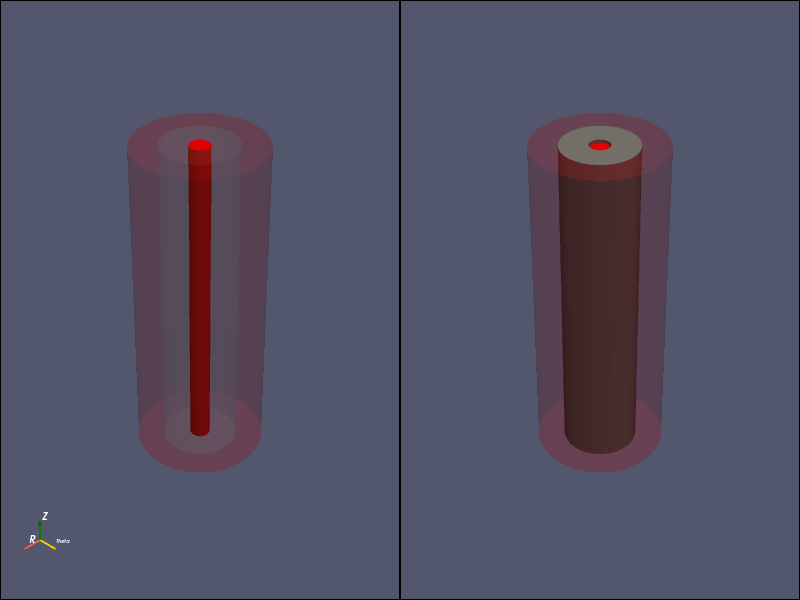

In [6]:
show_domain()

|  |
|:---:|
| <img width="380" src="pics/domain-sketch.png" title="sketch"> |
| <p style="text-align:center;"><b>Domain sketch.</b></p> |

## [Objectives](#toc)<a id="obj"></a>

- Determine the maximum temperature and pressure within the reflector flow channels
- Determine the decay heat power absorbed by the system at steady state
- Analyze heat flux across the surface of the pipe

## [Approach](#toc)<a id="app"></a>

### [Weak Form of Problem Statement](#toc)<a id="weakform"></a> 


In the solid phase the Galerkin weak form reads

\begin{align*}
\int_\Omega k\, \grad_\xpoint T \cdot \grad_\xpoint u \, dv 
+ \int_{\partial\Omega} k\,\partial_\normal T \, u \, da 
- \int_{\Omega} S \, u\, dv= 0
\end{align*}
while in the fluid phase:
\begin{align*}
\int_\Omega \rho c_p\, \grad_\xpoint T \cdot \velocity \, u \, dv + \int_\Omega k \grad_\xpoint T \cdot \grad_\xpoint u + \int_{d \Omega} \frac{dT}{d \vec{n}} u \ da = 0 .
\end{align*}

### [MOOSE Kernels](#toc)<a id="kernels"></a>

The following MOOSE kernels were implemented to solve the [weak form](#weakform):
1. Heat conduction by diffusion:
+ [interface](./include/kernels/HeatConduction.h) and [implementation](./src/kernels/HeatConduction.C).
+ A simple diffusion term used in both the solid and liquid phases.
2. Heat conduction by convection:  
+ [interface](./include/kernels/HeatConvection.h) and [implementation](./src/kernels/HeatConvection.C).
+ A convective term, with a velocity in the z-direction being given by the following turbulent profile:
+ $v = v_{max} * (1 - (\frac{r}{R})^n)$
+ where n is given by an empirical correlation and is dependent upon the reynolds number of the fluid.
3. Non-coupled convective heat transfer boundary condition:
+ [interface](./include/bcs/NormalFluxBC.h) and [implementation](./src/bcs/NormalFluxBC.C).
+ Used on the exterior boundaries, it ties the heat flux across the boundary to the temperature difference between the wall temperature and the bulk fluid on the other side.
4. Interfacial boundary conditions on Normal Flux:
+ ([interface](./include/interfkernels/InterfaceFlux.h)
+ Not fully implemented due to time constraints. Enforces continuity on the fluxes on both sides of the interior boundary.
5. Interfacial boundary conditions on Convective Flux:
+ [implementation](./src/bcs/InterfaceFlux.C)) and Convective Flux ([interface](./include/interfkernels/InterfaceConvection.h) and [implementation](./src/bcs/InterfaceConvection.C)).
+ Not fully implemented due to time constraints. Ties flux on either side of the boundary to the temperature difference across the boundary.

### [Tests](#toc)<a id="tests"></a>

#### [Graphite Reflector](#toc)<a id="reflector"></a>

In [2]:
'''Show Input File'''
!cat solid_phase.hit

# Engy-5310 Problem: Poisson 2D FEM
# UMass Lowell Nuclear Chemical Engineering
# Prof. Valmor F. de Almeida
# 25Apr21 19:25:00

# Parameters
xmin = 0 #m
xmax = 0.014 #m
ymin = 0 #m
ymax = 12 #m
therm_cond_fuel = 80 #w/m-k
source_s = 0 # no source
u_left = 500 # initial temp of 600 k
ConvectionCoeff = 605
InterfaceCoeff = -705

# calculate exterior heat transfer coefficient
#t_high = 700 + 373.15
#t_low = 600 + 373.15
#rho_high = 2413 - 0.488 * t_high # Janz et al. [1974], Janz [1988]
#rho_low = 2413 - 0.488 * t_low
#mu_high = 0.000116 * exp(3755/t_high) # Williams et al. [2006]
#mu_low = 0.000116 * exp(3755/t_low)
#c_high = 2416 # j/kg-k
#c_low = 2416
#k_high = 0.629697 + 0.0005 * t_high #Ignat'ev [2006], Williams [2006] and Allen [2010] et. al
#k_low = 0.629697 + 0.0005 * t_low
#D_h = 2 * xmax
#v = 2 #m/s
#Re_high = (rho_high * v * D_h) / mu_high
#Re_low = (rho_low * v * D_h) / mu_low
#Pr_high = (mu_high * c_high) / k_high
#Pr_low = (mu_low * c_low) / k_low
#Re_ave = (Re_high + Re_lo

In [3]:
'''Run the test'''
!./fhr-opt -i solid_phase.hit



Framework Information:
MOOSE Version:           git commit d2b4648b2d on 2021-02-18
LibMesh Version:         
PETSc Version:           3.14.2
SLEPc Version:           3.14.0
Current Time:            Mon May 10 00:37:51 2021
Executable Timestamp:    Sun May  9 15:55:19 2021

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          2
  Spatial Dimension:       2
  Nodes:                   
    Total:                 5876
    Local:                 5876
  Elems:                   
    Total:                 5625
    Local:                 5625
  Num Subdomains:          1
  Num Partitions:          1

Nonlinear System:
  Num DOFs:                5876
  Num Local DOFs:          5876
  Variables:               "T" 
  Finite Element Types:    "LAGRANGE" 
  Approximation Orders:    "FIRST" 

Execution Information:
  Executioner:             Steady
  Solver Mode:             NEWTON
  PETSc Preconditioner: 

In [ ]:
'''Input File'''

!cat liquid_phase.hit

#### [Interior Salt Coolant](#toc)<a id="salt"></a>

In [ ]:
'''FEM Solution'''

In [2]:
'''Input file'''
!cat liquid_phase.hit

# Engy-5310 Problem: Poisson 2D FEM
# UMass Lowell Nuclear Chemical Engineering
# Prof. Valmor F. de Almeida
# 25Apr21 19:25:00

# Parameters
xmin = 9.52500e-03
xmax = 3.49250e-02
ymin = -1.57162e-01
ymax = 1.57162e-01
therm_cond_fuel = 1.40000e+02
source_s = 2.37000e+08
u_left = 5.71150e+02

[Problem]
  type = FEProblem
  coord_type = RZ
  rz_coord_axis = Y
[]

[Mesh]
  [2d]
    type = GeneratedMeshGenerator
    dim = 2
    xmin = ${replace xmin}
    xmax = ${replace xmax}
    ymin = ${replace ymin}
    ymax = ${replace ymax}
    nx = 25
    ny = 225
  []
[]

[Variables]
  [T]
    order = first
    family = lagrange
    initial_condition = ${fparse (u_left)/1}
  []
[]

[Kernels]
  [heat-conduction-salt]
    type = HeatConduction
    variable = T     
    thermCond = ${replace therm_cond_fuel}
  []
  [nuclear-heat-source]
    type = NuclearHeat
    variable = T     
    sourceS = ${replace source_s}
  []
[]

[BCs]
  [east]
    type = DirichletBC
    variable = T
    boundary = left
   

In [2]:
'''Run Engy5310P1 MOOSE App'''

!./fhr-opt -i solid_phase.hit



Framework Information:
MOOSE Version:           git commit d2b4648b2d on 2021-02-18
LibMesh Version:         
PETSc Version:           3.14.2
SLEPc Version:           3.14.0
Current Time:            Tue Apr 27 23:46:07 2021
Executable Timestamp:    Tue Apr 27 23:18:59 2021

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          2
  Spatial Dimension:       2
  Nodes:                   
    Total:                 5876
    Local:                 5876
  Elems:                   
    Total:                 5625
    Local:                 5625
  Num Subdomains:          1
  Num Partitions:          1

Nonlinear System:
  Num DOFs:                5876
  Num Local DOFs:          5876
  Variables:               "T" 
  Finite Element Types:    "LAGRANGE" 
  Approximation Orders:    "FIRST" 

Execution Information:
  Executioner:             Steady
  Solver Mode:             NEWTON
  PETSc Preconditioner: 

UnstructuredGrid (0x7feff5bf6160)
  N Cells:	5625
  N Points:	5876
  X Bounds:	0.000e+00, 1.400e-02
  Y Bounds:	0.000e+00, 1.200e+01
  Z Bounds:	0.000e+00, 0.000e+00
  N Arrays:	4



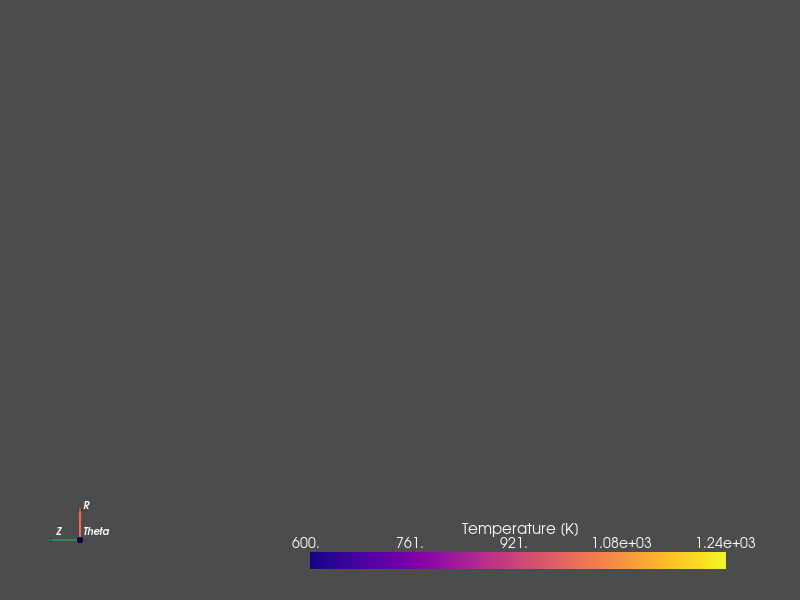

array([[[76, 76, 76],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [76, 76, 76]],

       [[76, 76, 76],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [76, 76, 76]],

       [[76, 76, 76],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [76, 76, 76]],

       ...,

       [[76, 76, 76],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [76, 76, 76]],

       [[76, 76, 76],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [76, 76, 76]],

       [[76, 76, 76],
        [76, 76, 76],
        [76, 76, 76],
        ...,
        [76, 76, 76],
        [76, 76, 76],
        [76, 76, 76]]], dtype=uint8)

In [1]:
'''Show 2D solution'''

import pyvista as pv
poisson = pv.read('out_000_0.vtu')
plo = pv.Plotter()   
plo.add_mesh(poisson, scalars='T', cmap='plasma', stitle='Temperature [K]')
plo.add_axes(xlabel='R', ylabel='Z', zlabel='Theta')
plo.set_viewup([1,0,0])
plo.screenshot('test.png')
cpos = plo.show(window_size=[800, 600])
#plotter.set_background('white')

In [ ]:
'''Fluxes, Y and X lines'''

## [Conclusions](#toc)<a id="conclusions"></a>
Non-coupled solution comes close to what the coupled solution would be; The reflector is thin enough that it does not act as a large barrier to heat transfer between the outer salt and the inner salt. Furthermore, the reflector does not get any hotter than its surroundings.

## [References](#toc)<a id="refs"></a>

- [1] V. F. de Almeida, [*Engy-5310: Computational Continuum Transport Phenomena*](https://github.com/dpploy/engy-5310), University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Energy Program).
- [2] Multiphysics Object-Oriented Simulation Environment [(MOOSE)](https://mooseframework.org)
- [3] Andreades, Charalampos et. al, [*Technical Description of the “Mark 1” Pebble-Bed Fluoride-Salt-Cooled High-Temperature Reactor (PB-FHR) Power Plant*](https://web.mit.edu/nse/pdf/researchstaff/forsberg/FHR%20Point%20Design%2014-002%20UCB.pdf), University of California Berkely, Dept. of Nuclear Engineering. 2014. 
- [4] author, [reference]()